# Try Neural Network on the Data

In [131]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA

In [121]:
# Load the data
df = pd.read_pickle('./tfidf_and_label.pkl')

In [122]:
df.shape

(152, 10272)

In [123]:
#Reduce dimension
# df.drop([col for col, val in df.sum().iteritems() if val < 0.8], axis=1, inplace=True)

In [124]:
df.shape

(152, 10272)

In [125]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10262,10263,10264,10265,10266,10267,10268,10269,10270,delta
index,,,,,,,,,,,,,,,,,,,,,
2018-09-27,0.038630,0.031266,0.038278,0.0,0.0,0.000000,0.0,0.0,0.000000,0.028857,...,0.0,0.0,0.0,0.048732,0.000000,0.0,0.0,0.059381,0.0,5.14
2018-09-28,0.034859,0.028180,0.038894,0.0,0.0,0.050773,0.0,0.0,0.000000,0.044293,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.113575,0.0,8.02
2018-10-01,0.029648,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,-8.93
2018-10-02,0.033476,0.030093,0.029726,0.0,0.0,0.030273,0.0,0.0,0.047335,0.000000,...,0.0,0.0,0.0,0.000000,0.056468,0.0,0.0,0.000000,0.0,14.04
2018-10-03,0.038343,0.021573,0.032601,0.0,0.0,0.032130,0.0,0.0,0.000000,0.033757,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.090318,0.0,-9.67


In [126]:
#Try out binary first. Make delta into 0 or 1
df['increase'] = (df.delta > 0) * 1 
df.increase[0:5]

index
2018-09-27    1
2018-09-28    1
2018-10-01    0
2018-10-02    1
2018-10-03    0
Name: increase, dtype: int64

In [144]:
#Train test split
X = df.drop(columns = ['increase', 'delta'])
Y = df['increase']

#Standardize the data first
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#Reduce dimensionality
# pca = PCA(n_components = 500)  
# X_train = pca.fit_transform(X_train)  
# X_test = pca.transform(X_test)  
# X_train.shape

In [147]:
# A simple two layer Neural Network.
def first_model(param_grid, input_size):
    model = Sequential()
    sgd = optimizers.SGD(lr=param_grid['learn_rate'], decay=param_grid['decay'], momentum=param_grid['momentum'], nesterov=True)
    sgd = 'adam'
    #Layer 1
    model.add(Dense(64, input_shape=(input_size,), activation= 'relu'))
    model.add(Dropout(0.2)) 
    
    #Layer 2
    model.add(Dense(32, input_shape=(input_size,), activation= 'relu'))
    model.add(Dropout(0.2)) 
    
    #Output Layer
    model.add(Dense(1)) #Need to use sigmoid for binary classification if Dense = 1
    model.add(Activation('sigmoid'))    
    
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# A function to plot the history of the results across different epochs.
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return

## Train for just one model

In [148]:
param_grid = {'decay': 0.1, 'learn_rate': 0.001, 'momentum': 0.5}
model = KerasClassifier(build_fn = first_model, param_grid = param_grid, input_size = X_train.shape[1])
history = model.fit(X_train, Y_train, batch_size = 2, epochs = 100, validation_data=(X_test, Y_test))

Train on 101 samples, validate on 51 samples
Epoch 1/100
101/101 [==============================] - 2s 21ms/step - loss: 1.2564 - acc: 0.4950 - val_loss: 1.1484 - val_acc: 0.4510
Epoch 2/100
101/101 [==============================] - 0s 5ms/step - loss: 0.4619 - acc: 0.8713 - val_loss: 2.1012 - val_acc: 0.4902
Epoch 3/100
101/101 [==============================] - 0s 5ms/step - loss: 0.1944 - acc: 0.9505 - val_loss: 1.7558 - val_acc: 0.4314
Epoch 4/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0809 - acc: 0.9802 - val_loss: 1.7756 - val_acc: 0.4118
Epoch 5/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0308 - acc: 0.9901 - val_loss: 1.8420 - val_acc: 0.4902
Epoch 6/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0241 - acc: 0.9901 - val_loss: 1.7883 - val_acc: 0.4902
Epoch 7/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0358 - acc: 0.9802 - val_loss: 1.7233 - val_acc: 0.4706
Epoch 8/100
101/101 [==

101/101 [==============================] - 0s 4ms/step - loss: 0.1606 - acc: 0.9802 - val_loss: 3.1586 - val_acc: 0.4706
Epoch 62/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0314 - acc: 0.9703 - val_loss: 6.8438 - val_acc: 0.4118
Epoch 63/100
101/101 [==============================] - 0s 5ms/step - loss: 0.4334 - acc: 0.9505 - val_loss: 5.3373 - val_acc: 0.4510
Epoch 64/100
101/101 [==============================] - 0s 5ms/step - loss: 0.1426 - acc: 0.9802 - val_loss: 5.5185 - val_acc: 0.4314
Epoch 65/100
101/101 [==============================] - 0s 5ms/step - loss: 0.2859 - acc: 0.9703 - val_loss: 4.4346 - val_acc: 0.4510
Epoch 66/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 4.0729 - val_acc: 0.4706
Epoch 67/100
101/101 [==============================] - 0s 5ms/step - loss: 2.6113e-04 - acc: 1.0000 - val_loss: 4.4780 - val_acc: 0.4706
Epoch 68/100
101/101 [==============================] - 1s 5ms/step - l

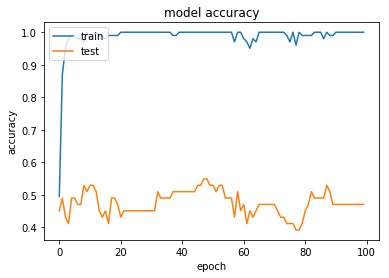

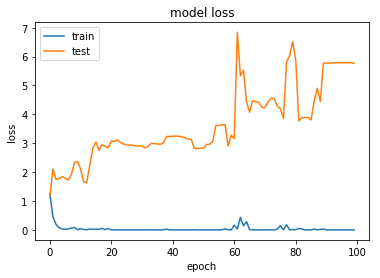

In [149]:
#Plot the history
plot_history(history)

## Run K Fold Cross Validation

In [104]:
estimator = KerasClassifier(build_fn = first_model, param_grid = param_grid, input_size = X_train.shape[1], 
                            epochs=100, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


Epoch 1/100
136/136 [==============================] - 1s 10ms/step - loss: 1.7204 - acc: 0.4412
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0716 - acc: 0.9632
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0019 - acc: 1.0000
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0022 - acc: 1.0000
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 2.2512e-04 - acc: 1.0000
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 2.8136e-04 - acc: 1.0000
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 1.1171e-04 - acc: 1.0000
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 5.2323e-04 - acc: 1.0000
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 2.9669e-04 - acc: 1.0000
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 1.2030e-04 - acc: 1.0000
Epoch 11/100
1

KeyboardInterrupt: 